# This notebook is for the sole purpose of generating the COMMON NAME - AVIBASE ID mapping from previously generated code

In [1]:
import pandas as pd

In [2]:
df_inat =  pd.read_csv('../data/gbif/occurrence.txt', delimiter='\t', quotechar='"', usecols=[
    'taxonID',
    'taxonKey',
    'countryCode',
    'stateProvince',
    'decimalLatitude',
    'decimalLongitude',
    'eventDate',
    'acceptedScientificName',
    'scientificName',
])

/var/folders/ms/2ygwp03d4b5526gc0h51spqh0000gn/T/ipykernel_25682/1441865066.py:1: DtypeWarning: Columns (138,180) have mixed types. Specify dtype option on import or set low_memory=False.
  df_inat =  pd.read_csv('../data/gbif/occurrence.txt', delimiter='\t', quotechar='"', usecols=[


In [3]:
df_inat.shape

(3321454, 9)

In [4]:
df_inat_22 = pd.read_csv('../data/gbif_22/occurrence.txt', delimiter='\t', quoting=3, usecols=[
    'taxonID',
    'taxonKey',
    'countryCode',
    'stateProvince',
    'decimalLatitude',
    'decimalLongitude',
    'eventDate',
    'acceptedScientificName',
    'scientificName',
])

In [5]:
df_inat_22.shape

(6686625, 9)

In [6]:
rel_columns_iNat = [
    'taxonID',
    'taxonKey',
    'countryCode',
    'stateProvince',
    'decimalLatitude',
    'decimalLongitude',
    'eventDate',
    'acceptedScientificName',
    'scientificName',
]
rel_columns_eBird = [
    'TAXON CONCEPT ID',
    'OBSERVATION COUNT',
    'COUNTRY',
    'STATE',
    'LATITUDE',
    'LONGITUDE',
    'OBSERVATION DATE',
    'SCIENTIFIC NAME',
    'COMMON NAME',
]

In [7]:
print(f"Total number of records: \n{df_inat.shape[0]:,} for 2019\n{df_inat_22.shape[0]:,} for 2022")

Total number of records: 
3,321,454 for 2019
6,686,625 for 2022


In [8]:
df_eBird = pd.read_csv('../data/eBird/ebd_US-CA_201901_201912_relApr-2023/ebd_US-CA_201901_201912_relApr-2023.txt', sep='\t', usecols=rel_columns_eBird)

In [9]:
df_eBird_22 = pd.read_csv('../data/eBird_ebd_US-CA_202201_202212_relSep-2023/ebd_US-CA_202201_202212_relSep-2023.txt', sep='\t', usecols=rel_columns_eBird)

In [10]:
print(f"Total number of records for eBird: \n{df_eBird.shape[0]:,} for 2019\n{df_eBird_22.shape[0]:,} for 2022")

Total number of records for eBird: 
8,694,926 for 2019
12,673,675 for 2022


In [11]:
df_iNat2 = df_inat[rel_columns_iNat].copy()
df_eBird2 = df_eBird[rel_columns_eBird].copy()
df_iNat2_22 = df_inat_22[rel_columns_iNat].copy()
df_eBird2_22 = df_eBird_22[rel_columns_eBird].copy()

In [12]:
df_iNat2.head()

,taxonID,taxonKey,countryCode,stateProvince,decimalLatitude,decimalLongitude,eventDate,acceptedScientificName,scientificName
0,123045,2515238.0,US,California,34.140209,-119.187897,2019-01-30T09:59:56,Puccinia evadens Harkn.,Puccinia evadens Harkn.
1,84994,5156078.0,US,Florida,28.059126,-82.418194,2019-01-21T14:35:00,"Acanthocephala declivis (Say, 1832)","Acanthocephala declivis (Say, 1832)"
2,36204,2451234.0,US,California,35.271399,-120.888941,2019-03-17T13:56:00,"Sceloporus occidentalis Baird & Girard, 1852","Sceloporus occidentalis Baird & Girard, 1852"
3,53326,3169708.0,US,Georgia,33.769633,-84.30645,2019-03-29T14:33:23,Vinca major L.,Vinca major L.
4,9176,5231132.0,US,Texas,33.562034,-101.809798,2019-04-02T12:44:00,"Zonotrichia leucophrys (J.R.Forster, 1772)","Zonotrichia leucophrys (J.R.Forster, 1772)"


In [13]:
df_iNat2['countryCode'].value_counts()

US    3321452
Name: countryCode, dtype: int64

In [14]:
df_iNat2_22['countryCode'].value_counts()

US    6686625
Name: countryCode, dtype: int64

# eBird Analysis

In [15]:
df_eBird2['COUNTRY'].value_counts()

United States    8694926
Name: COUNTRY, dtype: int64

In [16]:
df_eBird2_22['COUNTRY'].value_counts()

United States    12673675
Name: COUNTRY, dtype: int64

In [17]:
df_eBird2['STATE'].value_counts()

California    8694926
Name: STATE, dtype: int64

In [18]:
df_eBird2_22['STATE'].value_counts()

California    12673675
Name: STATE, dtype: int64

In [19]:
df_eBird2.head()

,TAXON CONCEPT ID,OBSERVATION COUNT,COUNTRY,STATE,LATITUDE,LONGITUDE,OBSERVATION DATE,SCIENTIFIC NAME,COMMON NAME
0,avibase-CA08045E,1,United States,California,37.892331,-122.311800,2019-01-13,Accipiter sp.,Accipiter sp.
1,avibase-CA08045E,X,United States,California,37.871270,-122.307890,2019-01-01,Accipiter sp.,Accipiter sp.
2,avibase-CA08045E,1,United States,California,37.834029,-122.238747,2019-01-25,Accipiter sp.,Accipiter sp.
3,avibase-CA08045E,1,United States,California,37.695328,-121.844741,2019-01-10,Accipiter sp.,Accipiter sp.
4,avibase-CA08045E,1,United States,California,37.834029,-122.238747,2019-01-25,Accipiter sp.,Accipiter sp.


In [20]:
df_eBird2['AVIBASEID'] = df_eBird2['TAXON CONCEPT ID'].apply(lambda x : x[-8:])
df_eBird2_22['AVIBASEID'] = df_eBird2_22['TAXON CONCEPT ID'].apply(lambda x : x[-8:])

# EDA on the whole dataset without any filters

In [21]:
print(f"""
    Some important statistics:
    +-------+------+------------+
    | eBird | 2019 | {df_eBird2.shape[0]:,} |
    | eBird | 2022 | {df_eBird2_22.shape[0]:,} |
    | iNat  | 2019 | {df_iNat2.shape[0]:,} |
    | iNat  | 2022 | {df_iNat2_22.shape[0]:,} |
""")


    Some important statistics:
    +-------+------+------------+
    | eBird | 2019 | 8,694,926 |
    | eBird | 2022 | 12,673,675 |
    | iNat  | 2019 | 3,321,454 |
    | iNat  | 2022 | 6,686,625 |



In [22]:
print(f"""
    Some important statistics:
    +-------+------+-----------------+---------------+
    | data  | year | category        | value         |
    | eBird | 2019 | nunique species | {df_eBird2['TAXON CONCEPT ID'].nunique():,} |
    | eBird | 2022 | nunique species | {df_eBird2_22['TAXON CONCEPT ID'].nunique():,} |
    | iNat  | 2019 | nunique species | {df_iNat2['taxonID'].nunique():,} |
    | iNat  | 2022 | nunique species | {df_iNat2_22['taxonID'].nunique():,} |
""")


    Some important statistics:
    +-------+------+-----------------+---------------+
    | data  | year | category        | value         |
    | eBird | 2019 | nunique species | 1,088 |
    | eBird | 2022 | nunique species | 1,108 |
    | iNat  | 2019 | nunique species | 49,685 |
    | iNat  | 2022 | nunique species | 58,267 |



In [23]:
df_eBird_median_by_species = df_eBird2[df_eBird2['OBSERVATION COUNT']!='X'].groupby('AVIBASEID')['OBSERVATION COUNT'].median().to_dict()
df_eBird_median_by_species_22 = df_eBird2_22[df_eBird2_22['OBSERVATION COUNT']!='X'].groupby('AVIBASEID')['OBSERVATION COUNT'].median().to_dict()

In [24]:
df_eBird2['OBSCOUNT'] = df_eBird2[['AVIBASEID','OBSERVATION COUNT']].apply(
    lambda row: (df_eBird_median_by_species[row['AVIBASEID']] if row['AVIBASEID'] in df_eBird_median_by_species else 1) if row['OBSERVATION COUNT'] == 'X' else row['OBSERVATION COUNT'],
    axis=1
)
df_eBird2_22['OBSCOUNT'] = df_eBird2_22[['AVIBASEID','OBSERVATION COUNT']].apply(
    lambda row: (df_eBird_median_by_species[row['AVIBASEID']] if row['AVIBASEID'] in df_eBird_median_by_species else 1) if row['OBSERVATION COUNT'] == 'X' else row['OBSERVATION COUNT'],
    axis=1
)

In [25]:
df_eBird2['OBSCOUNT'] = df_eBird2['OBSCOUNT'].astype(float)
df_eBird2_22['OBSCOUNT'] = df_eBird2_22['OBSCOUNT'].astype(float)

In [26]:
print(f"""
    Some important statistics:
    +-------+------+----------+---------------+----------------+
    | data  | year | category |  value  \t| increase (%) \t|
    | eBird | 2019 | num rows | {df_eBird2.shape[0]:,} \t|     NaN \t|
    | eBird | 2022 | num rows | {df_eBird2_22.shape[0]:,} \t| {100*(df_eBird2_22.shape[0]-df_eBird2.shape[0])/df_eBird2.shape[0]:.4f}\t |
    | eBird | 2019 | agg rows | {df_eBird2['OBSCOUNT'].sum():,} \t|     NaN \t|
    | eBird | 2022 | agg rows | {df_eBird2_22['OBSCOUNT'].sum():,} \t| {100*(df_eBird2_22['OBSCOUNT'].sum() - df_eBird2['OBSCOUNT'].sum())/df_eBird2['OBSCOUNT'].sum():.4f}\t |
    | iNat  | 2019 | num rows | {df_iNat2.shape[0]:,} \t|     NaN \t|
    | iNat  | 2022 | num rows | {df_iNat2_22.shape[0]:,} \t| {100*(df_iNat2_22.shape[0]-df_iNat2.shape[0])/df_iNat2.shape[0]:.4f}\t |
""")


    Some important statistics:
    +-------+------+----------+---------------+----------------+
    | data  | year | category |  value  	| increase (%) 	|
    | eBird | 2019 | num rows | 8,694,926 	|     NaN 	|
    | eBird | 2022 | num rows | 12,673,675 	| 45.7594	 |
    | eBird | 2019 | agg rows | 255,405,907.5 	|     NaN 	|
    | eBird | 2022 | agg rows | 372,180,164.5 	| 45.7210	 |
    | iNat  | 2019 | num rows | 3,321,454 	|     NaN 	|
    | iNat  | 2022 | num rows | 6,686,625 	| 101.3162	 |



# Beginning the filtering

In [27]:
df_eBird3 = df_eBird2[
    (df_eBird2['LATITUDE']>=36.4701132878)
    &
    (df_eBird2['LATITUDE']<=42.009518)
    &
    (df_eBird2['LONGITUDE']>= -124.409591)
    &
    (df_eBird2['LONGITUDE']<= -114.131211)
].copy()
df_eBird3_22 = df_eBird2_22[
    (df_eBird2_22['LATITUDE']>=36.4701132878)
    &
    (df_eBird2_22['LATITUDE']<=42.009518)
    &
    (df_eBird2_22['LONGITUDE']>= -124.409591)
    &
    (df_eBird2_22['LONGITUDE']<= -114.131211)
].copy()

In [28]:
df_eBird3['observation_datetime'] = pd.to_datetime(df_eBird3['OBSERVATION DATE'])
df_eBird3_22['observation_datetime'] = pd.to_datetime(df_eBird3_22['OBSERVATION DATE'])

In [29]:
df_eBird3['WEEK'] = df_eBird3['observation_datetime'].dt.week
df_eBird3_22['WEEK'] = df_eBird3_22['observation_datetime'].dt.week

/var/folders/ms/2ygwp03d4b5526gc0h51spqh0000gn/T/ipykernel_25682/1873497601.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_eBird3['WEEK'] = df_eBird3['observation_datetime'].dt.week
/var/folders/ms/2ygwp03d4b5526gc0h51spqh0000gn/T/ipykernel_25682/1873497601.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_eBird3_22['WEEK'] = df_eBird3_22['observation_datetime'].dt.week


In [30]:
df_eBird3['YEAR'] = df_eBird3['observation_datetime'].dt.year
df_eBird3_22['YEAR'] = df_eBird3_22['observation_datetime'].dt.year

In [31]:
df_iNat2['countryCode'].value_counts(),\
df_iNat2_22['countryCode'].value_counts()

(US    3321452
 Name: countryCode, dtype: int64,
 US    6686625
 Name: countryCode, dtype: int64)

In [32]:
df_iNat2['observation_dt'] = pd.to_datetime(df_iNat2['eventDate'])
df_iNat2_22['observation_dt'] = pd.to_datetime(df_iNat2_22['eventDate'])

In [33]:
df_iNat3 = df_iNat2[df_iNat2['stateProvince'] == 'California'].copy()
df_iNat3_22 = df_iNat2_22[df_iNat2_22['stateProvince'] == 'California'].copy()

In [34]:
df_iNat3['decimalLatitude'] = df_iNat3['decimalLatitude'].astype(float)
df_iNat3['decimalLongitude'] = df_iNat3['decimalLongitude'].astype(float)
df_iNat3_22['decimalLatitude'] = df_iNat3_22['decimalLatitude'].astype(float)
df_iNat3_22['decimalLongitude'] = df_iNat3_22['decimalLongitude'].astype(float)

In [35]:
df_iNat4 = df_iNat3[
    (df_iNat3['decimalLatitude']>=36.4701132878)
    &
    (df_iNat3['decimalLatitude']<=42.009518)
    &
    (df_iNat3['decimalLongitude']>= -124.409591)
    &
    (df_iNat3['decimalLongitude']<= -114.131211)
].copy()
df_iNat4_22 = df_iNat3_22[
    (df_iNat3_22['decimalLatitude']>=36.4701132878)
    &
    (df_iNat3_22['decimalLatitude']<=42.009518)
    &
    (df_iNat3_22['decimalLongitude']>= -124.409591)
    &
    (df_iNat3_22['decimalLongitude']<= -114.131211)
].copy()

In [36]:
df_iNat4['YEAR'] = df_iNat4['observation_dt'].dt.year
df_iNat4['WEEK'] = df_iNat4['observation_dt'].dt.week
df_iNat4_22['YEAR'] = df_iNat4_22['observation_dt'].dt.year
df_iNat4_22['WEEK'] = df_iNat4_22['observation_dt'].dt.week

/var/folders/ms/2ygwp03d4b5526gc0h51spqh0000gn/T/ipykernel_25682/2923923569.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_iNat4['WEEK'] = df_iNat4['observation_dt'].dt.week
/var/folders/ms/2ygwp03d4b5526gc0h51spqh0000gn/T/ipykernel_25682/2923923569.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_iNat4_22['WEEK'] = df_iNat4_22['observation_dt'].dt.week


In [37]:
print(f"""
    Some important statistics after filtering\n
    for geographic area:
    +-------+------+---------------------+----------------------+----------------+
    | data  | year |      category       |  value  \t\t| increase (%) \t|
    +-------+------+---------------------+----------------------+----------------+
    | eBird | 2019 |   num rows (all)    |   {df_eBird2.shape[0]:,} \t\t|     NaN \t|
    | eBird | 2022 |   num rows (all)    |   {df_eBird2_22.shape[0]:,} \t| {100*(df_eBird2_22.shape[0]-df_eBird2.shape[0])/df_eBird2.shape[0]:.4f}\t|
    | eBird | 2019 |   agg rows (all)    |   {df_eBird2['OBSCOUNT'].sum():,} \t|     NaN \t|
    | eBird | 2022 |   agg rows (all)    |   {df_eBird2_22['OBSCOUNT'].sum():,} \t| {100*(df_eBird2_22['OBSCOUNT'].sum() - df_eBird2['OBSCOUNT'].sum())/df_eBird2['OBSCOUNT'].sum():.4f}\t|
    | iNat  | 2019 |   num rows (all)    |   {df_iNat2.shape[0]:,} \t\t|     NaN \t|
    | iNat  | 2022 |   num rows (all)    |   {df_iNat2_22.shape[0]:,} \t\t| {100*(df_iNat2_22.shape[0]-df_iNat2.shape[0])/df_iNat2.shape[0]:.4f}\t|
    | eBird | 2019 |   num rows (filt)   |   {df_eBird3.shape[0]:,} \t\t|     NaN \t|
    | eBird | 2022 |   num rows (filt)   |   {df_eBird3_22.shape[0]:,} \t\t| {100*(df_eBird3_22.shape[0]-df_eBird3.shape[0])/df_eBird3.shape[0]:.4f}\t|
    | eBird | 2019 |   agg rows (filt)   |   {df_eBird3['OBSCOUNT'].sum():,} \t|     NaN \t|
    | eBird | 2022 |   agg rows (filt)   |   {df_eBird3_22['OBSCOUNT'].sum():,} \t| {100*(df_eBird3_22['OBSCOUNT'].sum() - df_eBird3['OBSCOUNT'].sum())/df_eBird3['OBSCOUNT'].sum():.4f}\t|
    | iNat  | 2019 |   num rows (filt)   |   {df_iNat4.shape[0]:,} \t \t|     NaN \t|
    | iNat  | 2022 |   num rows (filt)   |   {df_iNat4_22.shape[0]:,} \t\t| {100*(df_iNat4_22.shape[0]-df_iNat4.shape[0])/df_iNat4.shape[0]:.4f}\t|
    | eBird | 2019 | nunq species (all)  |   {df_eBird2['TAXON CONCEPT ID'].nunique():,} \t\t|
    | eBird | 2022 | nunq species (all)  |   {df_eBird2_22['TAXON CONCEPT ID'].nunique():,} \t\t|
    | iNat  | 2019 | nunq species (all)  |   {df_iNat2['taxonID'].nunique():,} \t\t|
    | iNat  | 2022 | nunq species (all)  |   {df_iNat2_22['taxonID'].nunique():,} \t\t|
    | eBird | 2019 | nunq species (fil)  |   {df_eBird3['TAXON CONCEPT ID'].nunique():,} \t\t|
    | eBird | 2022 | nunq species (fil)  |   {df_eBird3_22['TAXON CONCEPT ID'].nunique():,} \t\t|
    | iNat  | 2019 | nunq species (fil)  |   {df_iNat4['taxonID'].nunique():,} \t\t|
    | iNat  | 2022 | nunq species (fil)  |   {df_iNat4_22['taxonID'].nunique():,} \t\t|
""")


    Some important statistics after filtering

    for geographic area:
    +-------+------+---------------------+----------------------+----------------+
    | data  | year |      category       |  value  		| increase (%) 	|
    +-------+------+---------------------+----------------------+----------------+
    | eBird | 2019 |   num rows (all)    |   8,694,926 		|     NaN 	|
    | eBird | 2022 |   num rows (all)    |   12,673,675 	| 45.7594	|
    | eBird | 2019 |   agg rows (all)    |   255,405,907.5 	|     NaN 	|
    | eBird | 2022 |   agg rows (all)    |   372,180,164.5 	| 45.7210	|
    | iNat  | 2019 |   num rows (all)    |   3,321,454 		|     NaN 	|
    | iNat  | 2022 |   num rows (all)    |   6,686,625 		| 101.3162	|
    | eBird | 2019 |   num rows (filt)   |   5,168,169 		|     NaN 	|
    | eBird | 2022 |   num rows (filt)   |   7,018,777 		| 35.8078	|
    | eBird | 2019 |   agg rows (filt)   |   218,303,859.5 	|     NaN 	|
    | eBird | 2022 |   agg rows (filt)   |   318,394,6

# Merging iNat and eBird

In [38]:
df_tax_key = pd.read_csv('../data/query_taxonIDs_various.csv')

/var/folders/ms/2ygwp03d4b5526gc0h51spqh0000gn/T/ipykernel_25682/2743186917.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_tax_key = pd.read_csv('../data/query_taxonIDs_various.csv')


In [39]:
df_tax_key.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830987 entries, 0 to 830986
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   item       830987 non-null  object 
 1   iNat_Tid   830987 non-null  object 
 2   ITIS_TSN   314392 non-null  float64
 3   GBF_ID     809035 non-null  float64
 4   avibaseid  8795 non-null    object 
dtypes: float64(2), object(3)
memory usage: 31.7+ MB


# Adding avibase-id to iNat

In [40]:
df_tax_key_fil = df_tax_key[~df_tax_key['avibaseid'].isna()]

In [41]:
df_tax_key_fil = df_tax_key_fil[df_tax_key_fil['iNat_Tid']!='Frank'].copy()

In [42]:
df_tax_key_fil['iNat_Tid_num']= df_tax_key_fil['iNat_Tid'].astype(float)

In [43]:
merge_process1 = df_iNat4.merge(right=df_tax_key_fil, how='left', left_on='taxonID', right_on='iNat_Tid_num')
merge_process1_22 = df_iNat4_22.merge(right=df_tax_key_fil, how='left', left_on='taxonID', right_on='iNat_Tid_num')

In [44]:
merge_process2 = [x[0:8] for x in merge_process1['avibaseid'].dropna().values]
merge_process2_22 = [x[0:8] for x in merge_process1_22['avibaseid'].dropna().values]

In [45]:
merge_process3 = list(set(merge_process2))
merge_process3_22 = list(set(merge_process2))

In [46]:
len(merge_process3), len(merge_process3_22)

(392, 392)

In [47]:
final_list_birds = [x for x in df_eBird3['AVIBASEID'].unique() if x in merge_process3]
final_list_birds_22 = [x for x in df_eBird3_22['AVIBASEID'].unique() if x in merge_process3_22]

In [48]:
len(final_list_birds), len(final_list_birds_22)

(353, 341)

### Interestingly enough the number of birds that are common in both iNat and Avibase have decreased! 

In [49]:
final_list_birds2_l = list(set(final_list_birds))
final_list_birds2_s = set(final_list_birds)
final_list_birds2_l_22 = list(set(final_list_birds_22))
final_list_birds2_s_22 = set(final_list_birds_22)

In [50]:
len(final_list_birds2_l), len(final_list_birds2_l_22)

(353, 341)

# Filtering only the relevant birds

In [51]:
df_eBird4 = df_eBird3[df_eBird3['AVIBASEID'].isin(final_list_birds2_s)]
df_eBird4_22 = df_eBird3_22[df_eBird3_22['AVIBASEID'].isin(final_list_birds2_s_22)]

In [52]:
merge_process1.shape, merge_process1_22.shape

((364365, 18), (660098, 18))

In [53]:
df_iNat5 = merge_process1[~(merge_process1['avibaseid'].isna())].copy()
df_iNat5_22 = merge_process1_22[~(merge_process1_22['avibaseid'].isna())].copy()

In [54]:
df_iNat5['AVIBASEID'] = df_iNat5['avibaseid'].apply(lambda x: x[0:8])
df_iNat5_22['AVIBASEID'] = df_iNat5_22['avibaseid'].apply(lambda x: x[0:8])

In [55]:
df_iNat6 = df_iNat5.drop_duplicates().copy()
df_iNat6_22 = df_iNat5_22.drop_duplicates().copy()

In [56]:
df_iNat7 = df_iNat6[df_iNat6['AVIBASEID'].isin(final_list_birds2_s)]
df_iNat7_22 = df_iNat6_22[df_iNat6_22['AVIBASEID'].isin(final_list_birds2_s_22)]

# Adding Bird Name

In [57]:
name_birds = df_eBird[['TAXON CONCEPT ID', 'COMMON NAME']]
name_birds_22 = df_eBird_22[['TAXON CONCEPT ID', 'COMMON NAME']]

In [58]:
name_birds2 = name_birds.drop_duplicates().copy()
name_birds2_22 = name_birds_22.drop_duplicates().copy()

In [59]:
name_birds2.shape, name_birds2_22.shape

((1088, 2), (1108, 2))

In [60]:
name_birds2['AVIBASEID'] = name_birds2['TAXON CONCEPT ID'].apply(lambda x: x[-8:])
name_birds2_22['AVIBASEID'] = name_birds2_22['TAXON CONCEPT ID'].apply(lambda x: x[-8:])

In [61]:
df_eBird5 = df_eBird4.merge(name_birds2, how='left', on='AVIBASEID')
df_eBird5_22 = df_eBird4_22.merge(name_birds2_22, how='left', on='AVIBASEID')

In [62]:
df_iNat8 = df_iNat7.merge(name_birds2, how='left', on='AVIBASEID')
df_iNat8_22 = df_iNat7_22.merge(name_birds2_22, how='left', on='AVIBASEID')

In [63]:
eBird_avibaseid_counts = df_eBird5.groupby(['AVIBASEID']).count()['STATE'].to_dict()
eBird_avibaseid_counts_22 = df_eBird5_22.groupby(['AVIBASEID']).count()['STATE'].to_dict()

In [64]:
iNat_avibaseid_counts = df_iNat8.groupby("AVIBASEID").count()['stateProvince'].to_dict()
iNat_avibaseid_counts_22 = df_iNat8_22.groupby("AVIBASEID").count()['stateProvince'].to_dict()

In [65]:
df_eBird5['COMMON NAME'] = df_eBird5['COMMON NAME_x']
df_eBird5_22['COMMON NAME'] = df_eBird5_22['COMMON NAME_x']

In [66]:
eBird_weekly_counts = df_eBird5.groupby(['AVIBASEID', 'COMMON NAME', 'WEEK']).count().reset_index()
eBird_weekly_counts_22 = df_eBird5_22.groupby(['AVIBASEID', 'COMMON NAME', 'WEEK']).count().reset_index()

In [67]:
eBird_weekly_counts2 = eBird_weekly_counts[['AVIBASEID', 'COMMON NAME', 'WEEK', 'COUNTRY']].copy()
eBird_weekly_counts2_22 = eBird_weekly_counts_22[['AVIBASEID', 'COMMON NAME', 'WEEK', 'COUNTRY']].copy()

In [68]:
eBird_weekly_counts2_22

,AVIBASEID,COMMON NAME,WEEK,COUNTRY
0,000482C9,Orchard Oriole,22,7
1,000482C9,Orchard Oriole,35,5
2,000482C9,Orchard Oriole,37,16
3,000482C9,Orchard Oriole,38,28
4,000482C9,Orchard Oriole,39,44
...,...,...,...,...
13827,FFF61080,Orange-crowned Warbler,48,173
13828,FFF61080,Orange-crowned Warbler,49,154
13829,FFF61080,Orange-crowned Warbler,50,332
13830,FFF61080,Orange-crowned Warbler,51,167


In [69]:
eBird_weekly_counts2.columns = [
    'AVIBASEID', 'COMMON NAME', 'WEEK', 'COUNTS'
]
eBird_weekly_counts2_22.columns = [
    'AVIBASEID', 'COMMON NAME', 'WEEK', 'COUNTS'
]

In [70]:
eBird_weekly_counts2

,AVIBASEID,COMMON NAME,WEEK,COUNTS
0,000482C9,Orchard Oriole,1,50
1,000482C9,Orchard Oriole,2,17
2,000482C9,Orchard Oriole,3,8
3,000482C9,Orchard Oriole,4,6
4,000482C9,Orchard Oriole,5,11
...,...,...,...,...
13675,FFF61080,Orange-crowned Warbler,48,135
13676,FFF61080,Orange-crowned Warbler,49,141
13677,FFF61080,Orange-crowned Warbler,50,227
13678,FFF61080,Orange-crowned Warbler,51,183


In [71]:
eBird_weekly_counts2['REL_COUNTS'] = eBird_weekly_counts2.apply(
    lambda row: row['COUNTS']/ eBird_avibaseid_counts[row['AVIBASEID']],
    axis=1
).copy()
eBird_weekly_counts2_22['REL_COUNTS'] = eBird_weekly_counts2_22.apply(
    lambda row: row['COUNTS']/ eBird_avibaseid_counts_22[row['AVIBASEID']],
    axis=1
).copy()

In [72]:
eBird_weekly_counts2['REL_COUNTS'].sum()

353.0

In [73]:
eBird_weekly_counts2_22['REL_COUNTS'].sum()

341.0

In [74]:
iNat_weekly_counts = df_iNat8.groupby(['AVIBASEID', 'COMMON NAME', 'WEEK']).count().reset_index()
iNat_weekly_counts_22 = df_iNat8_22.groupby(['AVIBASEID', 'COMMON NAME', 'WEEK']).count().reset_index()

In [75]:
iNat_weekly_counts2 = iNat_weekly_counts[['AVIBASEID', 'COMMON NAME', 'WEEK', 'countryCode']].copy()
iNat_weekly_counts2_22 = iNat_weekly_counts_22[['AVIBASEID', 'COMMON NAME', 'WEEK', 'countryCode']].copy()

In [76]:
iNat_weekly_counts2.columns = [
    'AVIBASEID', 'COMMON NAME', 'WEEK', 'COUNTS'
]
iNat_weekly_counts2_22.columns = [
    'AVIBASEID', 'COMMON NAME', 'WEEK', 'COUNTS'
]

In [77]:
iNat_weekly_counts2

,AVIBASEID,COMMON NAME,WEEK,COUNTS
0,000482C9,Orchard Oriole,1,1
1,000482C9,Orchard Oriole,2,2
2,000482C9,Orchard Oriole,9,1
3,000482C9,Orchard Oriole,38,1
4,000482C9,Orchard Oriole,40,2
...,...,...,...,...
8848,FFF61080,Orange-crowned Warbler,48,1
8849,FFF61080,Orange-crowned Warbler,49,2
8850,FFF61080,Orange-crowned Warbler,50,4
8851,FFF61080,Orange-crowned Warbler,51,1


In [78]:
iNat_weekly_counts2['REL_COUNTS'] = iNat_weekly_counts2.apply(
    lambda row: row['COUNTS']/ iNat_avibaseid_counts[row['AVIBASEID']],
    axis=1
).copy()
iNat_weekly_counts2_22['REL_COUNTS'] = iNat_weekly_counts2_22.apply(
    lambda row: row['COUNTS']/ iNat_avibaseid_counts_22[row['AVIBASEID']],
    axis=1
).copy()

In [79]:
iNat_weekly_counts2['REL_COUNTS'].sum()

352.99999999999994

In [80]:
iNat_weekly_counts2.groupby(['AVIBASEID']).sum()['COUNTS'].values

/var/folders/ms/2ygwp03d4b5526gc0h51spqh0000gn/T/ipykernel_25682/351623232.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  iNat_weekly_counts2.groupby(['AVIBASEID']).sum()['COUNTS'].values


array([   8,  606,   98,  201,  121,   12,    9,   45,  115,  179,    4,
         10,  235,  200,  197,    5,    1,   44,  176,  267,   83,    1,
          2,  193,  311,   41,    3,    1,    6,  252,   78,   10,   28,
         17,   45,   66,   32,    3, 1260,  121,   44,   30,   20,   40,
         12,    5,  149,  266,    5,   33,    1,  284,   40,    2,   11,
        205,    5,    3,    8,  146,  608,  677,  269,  347,  396,  438,
          8,   45,  140,    6,  182,  188,  383,   23,    4,    4,   19,
         40,    9,   23,  157,   81,   27,   13,    1,  211,  496,  236,
        251,  127,    9, 1160,   76,    9,   32,  195,    3,  961,   41,
         75,  132,   88,  326,    1,    1,   46,    6, 1931,   76,  248,
          6,    5, 1537,   16,  358,   16,   38,   49,    6,    4,    8,
          2,    2,   88,  140,  428,  185,    9, 2342,  170,   41,    3,
         26,  961,  281, 1279,   15,   50,  364,   21,   35,  219,    6,
        145,   64,  418,  145,  320,    1,   22,   

In [81]:
iNat_weekly_counts2\
    .groupby(['AVIBASEID']).sum()['COUNTS']\
        [(iNat_weekly_counts2.groupby(['AVIBASEID'])\
        .sum()['COUNTS'].values)>=50].sort_values()[0:10]

/var/folders/ms/2ygwp03d4b5526gc0h51spqh0000gn/T/ipykernel_25682/3697873596.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .groupby(['AVIBASEID']).sum()['COUNTS']\
/var/folders/ms/2ygwp03d4b5526gc0h51spqh0000gn/T/ipykernel_25682/3697873596.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .sum()['COUNTS'].values)>=50].sort_values()[0:10]


AVIBASEID
88AB027C    50
58312873    50
A8C34DC9    52
E53FC25C    54
AC1E519F    56
89F8B6F5    57
BD929CBC    57
B48335B1    58
8DB64266    60
7784B060    63
Name: COUNTS, dtype: int64

In [82]:
name_avID_dict = iNat_weekly_counts2.iloc[:, 0:2].drop_duplicates().copy().set_index('AVIBASEID')['COMMON NAME'].to_dict()
name_avID_dict_22 = iNat_weekly_counts2_22.iloc[:, 0:2].drop_duplicates().copy().set_index('AVIBASEID')['COMMON NAME'].to_dict()

In [83]:
eBird_curves_discrete = eBird_weekly_counts2.pivot_table(index='AVIBASEID', columns='WEEK', values='REL_COUNTS' )
eBird_curves_discrete_22 = eBird_weekly_counts2_22.pivot_table(index='AVIBASEID', columns='WEEK', values='REL_COUNTS' )

In [84]:
eBird_curves_discrete.fillna(value=0, inplace=True)
eBird_curves_discrete_22.fillna(value=0, inplace=True)

In [85]:
iNat_curves_discrete = iNat_weekly_counts2.pivot_table(index='AVIBASEID', columns='WEEK', values='REL_COUNTS' )
iNat_curves_discrete_22 = iNat_weekly_counts2_22.pivot_table(index='AVIBASEID', columns='WEEK', values='REL_COUNTS' )

In [86]:
iNat_curves_discrete.fillna(value=0, inplace=True)
iNat_curves_discrete_22.fillna(value=0, inplace=True)

In [87]:
eBird_curves_discrete

WEEK,1,2,3,4,5,6,7,8,9,10,...,43,44,45,46,47,48,49,50,51,52
AVIBASEID,,,,,,,,,,,,,,,,,,,,,
000482C9,0.119048,0.040476,0.019048,0.014286,0.026190,0.007143,0.014286,0.009524,0.009524,0.014286,...,0.026190,0.033333,0.038095,0.040476,0.042857,0.021429,0.004762,0.021429,0.028571,0.042857
00124D98,0.022217,0.017285,0.012884,0.018823,0.015717,0.016278,0.016436,0.018622,0.015286,0.017831,...,0.010181,0.012554,0.012022,0.014452,0.013028,0.012022,0.012741,0.018349,0.015386,0.017026
00635FF9,0.014224,0.007715,0.009643,0.014706,0.005304,0.006750,0.009161,0.015670,0.003857,0.007473,...,0.013259,0.010849,0.017840,0.016876,0.013259,0.005786,0.005304,0.016152,0.007956,0.013259
01060BFD,0.021075,0.017118,0.009295,0.021535,0.008927,0.015093,0.011412,0.016934,0.008099,0.009111,...,0.014817,0.019418,0.022731,0.016013,0.017394,0.015553,0.014081,0.015829,0.009387,0.014265
018B3169,0.062974,0.057585,0.037885,0.063984,0.046304,0.040411,0.040579,0.059269,0.036707,0.028456,...,0.009092,0.027277,0.038727,0.031824,0.033002,0.034349,0.034012,0.049167,0.023741,0.041253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FC366114,0.041123,0.026198,0.021083,0.032773,0.021188,0.022231,0.020770,0.029746,0.019100,0.023797,...,0.016282,0.015134,0.019309,0.020248,0.018474,0.010437,0.014925,0.034548,0.023484,0.020562
FD2B0309,0.027732,0.018818,0.016177,0.027567,0.008254,0.007098,0.008749,0.018323,0.003136,0.013701,...,0.013866,0.018983,0.016507,0.022945,0.023440,0.016177,0.008088,0.008584,0.015517,0.014526
FED3756C,0.045327,0.034529,0.028118,0.050163,0.017321,0.025644,0.023394,0.028681,0.020020,0.016871,...,0.013159,0.014059,0.014509,0.023282,0.035429,0.022720,0.016309,0.037454,0.027443,0.032167


In [88]:
iNat_curves_discrete

WEEK,1,2,3,4,5,6,7,8,9,10,...,43,44,45,46,47,48,49,50,51,52
AVIBASEID,,,,,,,,,,,,,,,,,,,,,
000482C9,0.125000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,...,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
00124D98,0.011551,0.014851,0.004950,0.021452,0.013201,0.003300,0.004950,0.013201,0.009901,0.014851,...,0.011551,0.011551,0.006601,0.019802,0.004950,0.014851,0.009901,0.008251,0.018152,0.006601
00635FF9,0.010204,0.000000,0.010204,0.010204,0.020408,0.010204,0.020408,0.000000,0.000000,0.020408,...,0.030612,0.020408,0.051020,0.010204,0.000000,0.030612,0.000000,0.020408,0.000000,0.010204
01060BFD,0.019900,0.029851,0.000000,0.029851,0.000000,0.004975,0.024876,0.014925,0.000000,0.004975,...,0.004975,0.014925,0.054726,0.004975,0.029851,0.014925,0.000000,0.019900,0.000000,0.009950
018B3169,0.049587,0.049587,0.016529,0.074380,0.024793,0.024793,0.000000,0.057851,0.000000,0.033058,...,0.008264,0.016529,0.049587,0.041322,0.008264,0.024793,0.016529,0.049587,0.057851,0.057851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FC366114,0.014205,0.008523,0.008523,0.036932,0.028409,0.017045,0.011364,0.019886,0.011364,0.022727,...,0.008523,0.017045,0.008523,0.031250,0.017045,0.005682,0.005682,0.014205,0.019886,0.005682
FD2B0309,0.000000,0.025105,0.033473,0.033473,0.008368,0.012552,0.000000,0.016736,0.000000,0.008368,...,0.037657,0.016736,0.004184,0.020921,0.016736,0.025105,0.004184,0.008368,0.029289,0.008368
FED3756C,0.021739,0.039855,0.014493,0.057971,0.021739,0.010870,0.039855,0.028986,0.010870,0.014493,...,0.021739,0.003623,0.025362,0.025362,0.014493,0.010870,0.010870,0.025362,0.014493,0.043478


In [89]:
import matplotlib.pyplot as plt

In [90]:
%config inlineBackend.figure_format = 'retina'

In [91]:
import scipy

In [92]:
def function_smoothing(x, sigma=3):
    y = scipy.ndimage.gaussian_filter(
        x,
        sigma
    )
    return y


In [93]:
def make_smooth_curves(x, sigma=3, lims=(0,0.1)):
    aviID = x
    plt.ylim(lims)
    y1_smoothed = function_smoothing(
        iNat_curves_discrete.loc[aviID, :],
        sigma=sigma
    )
    y2_smoothed = function_smoothing(
        eBird_curves_discrete.loc[aviID, :],
        sigma=sigma
    )
    y1_smoothed_22 = function_smoothing(
        iNat_curves_discrete_22.loc[aviID, :],
        sigma=sigma
    )
    y2_smoothed_22 = function_smoothing(
        eBird_curves_discrete_22.loc[aviID, :],
        sigma=sigma
    )
    plt.plot(y1_smoothed, label='iNat_data (2019)')
    plt.plot(y2_smoothed, label='eBird_data (2019)')
    plt.plot(y1_smoothed_22, label='iNat_data (2022)')
    plt.plot(y2_smoothed_22, label='eBird_data (2022)')
    plt.legend()
    plt.title(f"Observation Curves for the bird: {name_avID_dict[x]}")

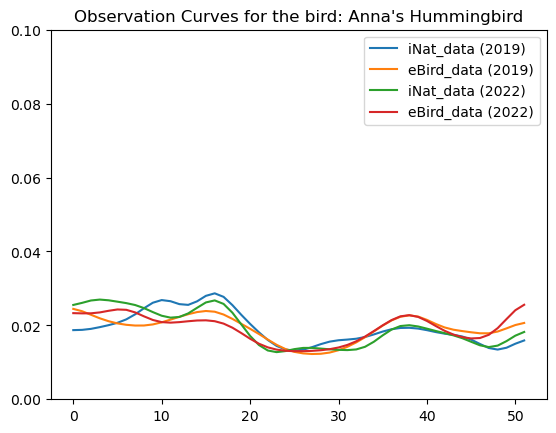

In [94]:
make_smooth_curves("42393721", sigma=2)

In [95]:
import numpy as np

In [96]:
def make_smooth_curves_rm2wk_iNat(x, sigma=3, lims=(0,0.1)):
    aviID = x
    plt.ylim(lims)
    y1 = iNat_curves_discrete.loc[aviID, :].values.copy()
    y1_22 = iNat_curves_discrete_22.loc[aviID, :].values.copy()
    y1[16:18] = np.mean(y1[13:21])
    y1_22[16:18] = np.mean(y1_22[13:21])
    y1_smoothed = function_smoothing(
        y1,
        sigma=sigma
    )
    y2_smoothed = function_smoothing(
        eBird_curves_discrete.loc[aviID, :],
        sigma=sigma
    )
    y1_smoothed_22 = function_smoothing(
        y1_22,
        sigma=sigma
    )
    y2_smoothed_22 = function_smoothing(
        eBird_curves_discrete_22.loc[aviID, :],
        sigma=sigma
    )
    plt.plot(y1_smoothed, label='iNat_data (2019)')
    plt.plot(y2_smoothed, label='eBird_data (2019)')
    plt.plot(y1_smoothed_22, label='iNat_data (2022)')
    plt.plot(y2_smoothed_22, label='eBird_data (2022)')
    
    plt.legend()
    plt.title(f"Observation Curves for the bird: {name_avID_dict[x]}")

536A5157    2342
42393721    1931
85625D75    1828
8601A467    1539
49D9148A 

In [97]:
88AB027C    50
58312873    50
A8C34DC9    52
E53FC25C    54
AC1E519F    56
89F8B6F5    57
BD929CBC    57
B48335B1 

SyntaxError: invalid decimal literal (3076056708.py, line 1)

Good Plots:
- E53FC25C

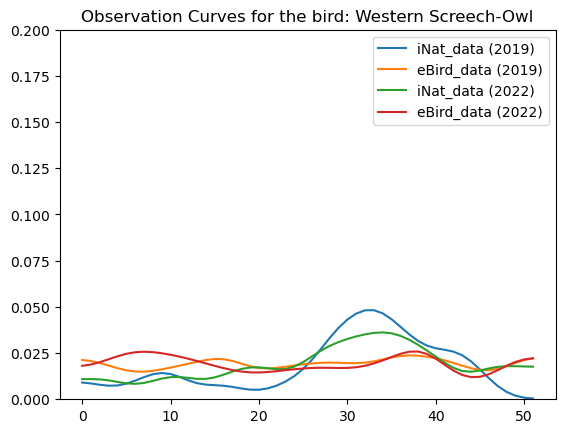

In [98]:
make_smooth_curves_rm2wk_iNat("89F8B6F5", sigma=2.5, lims=(0,0.2))

Notes:
- Smoothings: Fourier
- Curve Representation: Optimal Transport Map
- Play with filtering
- More years?
- Common Birds
- Comparison of Curves in multiple years and with diff data sources
- PCA vs FPCA (Dimension Reduction)

In [99]:
eBird_curves_discrete

WEEK,1,2,3,4,5,6,7,8,9,10,...,43,44,45,46,47,48,49,50,51,52
AVIBASEID,,,,,,,,,,,,,,,,,,,,,
000482C9,0.119048,0.040476,0.019048,0.014286,0.026190,0.007143,0.014286,0.009524,0.009524,0.014286,...,0.026190,0.033333,0.038095,0.040476,0.042857,0.021429,0.004762,0.021429,0.028571,0.042857
00124D98,0.022217,0.017285,0.012884,0.018823,0.015717,0.016278,0.016436,0.018622,0.015286,0.017831,...,0.010181,0.012554,0.012022,0.014452,0.013028,0.012022,0.012741,0.018349,0.015386,0.017026
00635FF9,0.014224,0.007715,0.009643,0.014706,0.005304,0.006750,0.009161,0.015670,0.003857,0.007473,...,0.013259,0.010849,0.017840,0.016876,0.013259,0.005786,0.005304,0.016152,0.007956,0.013259
01060BFD,0.021075,0.017118,0.009295,0.021535,0.008927,0.015093,0.011412,0.016934,0.008099,0.009111,...,0.014817,0.019418,0.022731,0.016013,0.017394,0.015553,0.014081,0.015829,0.009387,0.014265
018B3169,0.062974,0.057585,0.037885,0.063984,0.046304,0.040411,0.040579,0.059269,0.036707,0.028456,...,0.009092,0.027277,0.038727,0.031824,0.033002,0.034349,0.034012,0.049167,0.023741,0.041253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FC366114,0.041123,0.026198,0.021083,0.032773,0.021188,0.022231,0.020770,0.029746,0.019100,0.023797,...,0.016282,0.015134,0.019309,0.020248,0.018474,0.010437,0.014925,0.034548,0.023484,0.020562
FD2B0309,0.027732,0.018818,0.016177,0.027567,0.008254,0.007098,0.008749,0.018323,0.003136,0.013701,...,0.013866,0.018983,0.016507,0.022945,0.023440,0.016177,0.008088,0.008584,0.015517,0.014526
FED3756C,0.045327,0.034529,0.028118,0.050163,0.017321,0.025644,0.023394,0.028681,0.020020,0.016871,...,0.013159,0.014059,0.014509,0.023282,0.035429,0.022720,0.016309,0.037454,0.027443,0.032167


In [100]:
iNat_curves_discrete

WEEK,1,2,3,4,5,6,7,8,9,10,...,43,44,45,46,47,48,49,50,51,52
AVIBASEID,,,,,,,,,,,,,,,,,,,,,
000482C9,0.125000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,...,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
00124D98,0.011551,0.014851,0.004950,0.021452,0.013201,0.003300,0.004950,0.013201,0.009901,0.014851,...,0.011551,0.011551,0.006601,0.019802,0.004950,0.014851,0.009901,0.008251,0.018152,0.006601
00635FF9,0.010204,0.000000,0.010204,0.010204,0.020408,0.010204,0.020408,0.000000,0.000000,0.020408,...,0.030612,0.020408,0.051020,0.010204,0.000000,0.030612,0.000000,0.020408,0.000000,0.010204
01060BFD,0.019900,0.029851,0.000000,0.029851,0.000000,0.004975,0.024876,0.014925,0.000000,0.004975,...,0.004975,0.014925,0.054726,0.004975,0.029851,0.014925,0.000000,0.019900,0.000000,0.009950
018B3169,0.049587,0.049587,0.016529,0.074380,0.024793,0.024793,0.000000,0.057851,0.000000,0.033058,...,0.008264,0.016529,0.049587,0.041322,0.008264,0.024793,0.016529,0.049587,0.057851,0.057851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FC366114,0.014205,0.008523,0.008523,0.036932,0.028409,0.017045,0.011364,0.019886,0.011364,0.022727,...,0.008523,0.017045,0.008523,0.031250,0.017045,0.005682,0.005682,0.014205,0.019886,0.005682
FD2B0309,0.000000,0.025105,0.033473,0.033473,0.008368,0.012552,0.000000,0.016736,0.000000,0.008368,...,0.037657,0.016736,0.004184,0.020921,0.016736,0.025105,0.004184,0.008368,0.029289,0.008368
FED3756C,0.021739,0.039855,0.014493,0.057971,0.021739,0.010870,0.039855,0.028986,0.010870,0.014493,...,0.021739,0.003623,0.025362,0.025362,0.014493,0.010870,0.010870,0.025362,0.014493,0.043478


In [101]:
eBird_weekly_counts2['COUNTS'].sum()

3842332

In [102]:
freq_ebird_birds = eBird_weekly_counts2.groupby('AVIBASEID').sum()['COUNTS']/38423.32

/var/folders/ms/2ygwp03d4b5526gc0h51spqh0000gn/T/ipykernel_25682/998403258.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  freq_ebird_birds = eBird_weekly_counts2.groupby('AVIBASEID').sum()['COUNTS']/38423.32


In [103]:
iNat_weekly_counts2['COUNTS'].sum()

71565

In [104]:
freq_inat_birds = iNat_weekly_counts2.groupby('AVIBASEID').sum()['COUNTS']/715.65

/var/folders/ms/2ygwp03d4b5526gc0h51spqh0000gn/T/ipykernel_25682/375797155.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  freq_inat_birds = iNat_weekly_counts2.groupby('AVIBASEID').sum()['COUNTS']/715.65


In [105]:
freq_ebird_birds.sort_values()

AVIBASEID
4AED44E8    0.000026
A8C34DC9    0.000052
56036504    0.000078
D4540F88    0.000104
1044B438    0.000104
              ...   
36B3872D    2.421889
151C2B3F    2.544080
89431E9F    2.557692
42393721    2.736723
B182DED2    2.874973
Name: COUNTS, Length: 353, dtype: float64

In [106]:
name_avID_dict["B182DED2"]

'Black Phoebe'

In [110]:
len(name_avID_dict), len(name_avID_dict_22)

(353, 331)

In [111]:
import pickle

with open('./generated_data/name_aviD_dict_19.pickle', 'wb') as f:
    pickle.dump(name_avID_dict, f)

with open('./generated_data/name_aviD_dict_22.pickle', 'wb') as f:
    pickle.dump(name_avID_dict_22, f)

In [113]:
with open('./generated_data/name_aviD_dict_22.pickle', 'rb') as f:
    trial_obj = pickle.load(f)

In [114]:
trial_obj

{'000482C9': 'Orchard Oriole',
 '00124D98': 'Mourning Dove',
 '00635FF9': 'Pileated Woodpecker',
 '01060BFD': 'Western Sandpiper',
 '018B3169': 'Horned Grebe',
 '029491CD': 'Gray-crowned Rosy-Finch',
 '0337440E': "Bonaparte's Gull",
 '03AC32BA': 'Glaucous-winged Gull',
 '0413ED30': 'Black Turnstone',
 '043F337A': 'Indigo Bunting',
 '049D9AEA': 'Northern Fulmar',
 '06B9BD24': 'Sanderling',
 '0716A71C': 'Red-breasted Nuthatch',
 '0783A7EA': 'Ring-necked Duck',
 '07C11CF3': 'Pacific Golden-Plover',
 '08F22F84': 'Flesh-footed Shearwater',
 '0A4609D1': 'Red-footed Booby',
 '0ADA5F17': 'Western Tanager',
 '0B1B2EB6': 'Fox Sparrow',
 '0BCBA6B9': 'Tundra Swan',
 '0BDB87DE': 'Painted Bunting',
 '0D88C072': 'Spotted Sandpiper',
 '0E599E6C': 'Cinnamon Teal',
 '0EB07C12': 'Hermit Warbler',
 '1044B438': 'Helmeted Guineafowl',
 '115AF02D': 'Black Tern',
 '115F04DD': 'Green-winged Teal',
 '11CF8C9A': 'Surfbird',
 '12D5BA6C': 'Iceland Gull',
 '12E354E2': 'Red-masked Parakeet',
 '135564AA': 'Red Crossb